In [73]:
#Importamos todos los paquetes que vamos a necesitar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt

In [74]:
# cargamos nuestro dataset
modelo = pd.read_csv('modelo.csv')

ANALISIS MULTIVARIADO DE DATOS

In [5]:
#Estandarizar una variable
from scipy.stats import zscore
modelo['ROA (z)'] = zscore(modelo['ROA'])
print(modelo)

                paises        mes  year       ROA      SIZE       CAP  \
0    Banco Continental     enero   2014 -0.013965  0.015743 -0.021277   
1    Banco Continental    febrero  2014 -0.010738 -0.004098  0.000000   
2    Banco Continental      marzo  2014 -0.001870  0.014318 -0.006441   
3    Banco Continental      abril  2014 -0.001295 -0.009271  0.004052   
4    Banco Continental       mayo  2014 -0.001231  0.008980  0.045198   
..                 ...        ...   ...       ...       ...       ...   
891       Banco Azteca  diciembre  2018  0.031409 -0.006974  0.014571   
892       Banco Azteca     enero   2019 -0.178337 -0.000276 -0.009848   
893       Banco Azteca    febrero  2019 -0.159987 -0.021146 -0.034811   
894       Banco Azteca      marzo  2019  0.188452  0.003334  0.001288   
895       Banco Azteca      abril  2019 -0.015154  0.003013  0.001286   

         LOAN       DEP      PROV   ROA (z)  
0   -0.003443 -0.022750  0.024337 -0.065237  
1   -0.011496  0.028613  0.0160

In [11]:
from scipy import stats
import numpy as np

indice_bbva = modelo['paises']=='Banco Continental'


modelo['roa_bbva (z)'] = np.zeros(len(modelo))  # ponemos 0 para despues poder modificarla
print(modelo)
modelo['roa_bbva (z)'][indice_bbva] = stats.zscore(modelo['ROA'][indice_bbva])
print(modelo)


                paises        mes  year       ROA      SIZE       CAP  \
0    Banco Continental     enero   2014 -0.013965  0.015743 -0.021277   
1    Banco Continental    febrero  2014 -0.010738 -0.004098  0.000000   
2    Banco Continental      marzo  2014 -0.001870  0.014318 -0.006441   
3    Banco Continental      abril  2014 -0.001295 -0.009271  0.004052   
4    Banco Continental       mayo  2014 -0.001231  0.008980  0.045198   
..                 ...        ...   ...       ...       ...       ...   
891       Banco Azteca  diciembre  2018  0.031409 -0.006974  0.014571   
892       Banco Azteca     enero   2019 -0.178337 -0.000276 -0.009848   
893       Banco Azteca    febrero  2019 -0.159987 -0.021146 -0.034811   
894       Banco Azteca      marzo  2019  0.188452  0.003334  0.001288   
895       Banco Azteca      abril  2019 -0.015154  0.003013  0.001286   

         LOAN       DEP      PROV   ROA (z)  roa_bbva (z)  
0   -0.003443 -0.022750  0.024337 -0.065237           0.0  
1  

<ipython-input-11-b1882f3fac9b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modelo['roa_bbva (z)'][indice_bbva] = stats.zscore(modelo['ROA'][indice_bbva])


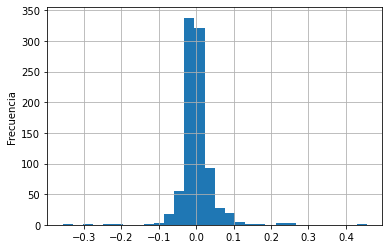

In [17]:
modelo['CAP'].hist(bins = 30)
plt.ylabel('Frecuencia')
plt.show()

<AxesSubplot:>

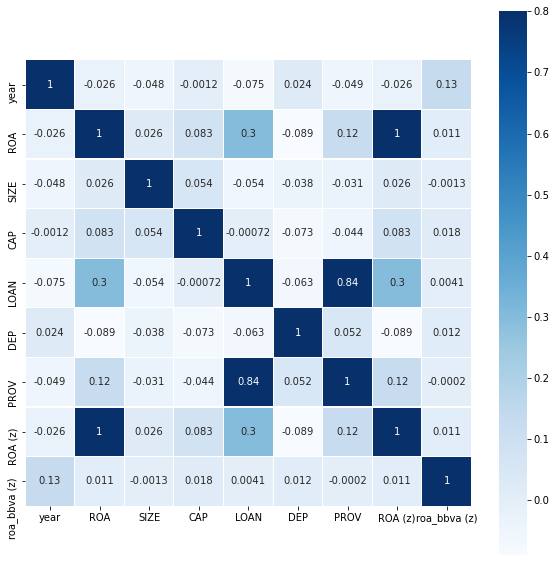

In [25]:
corr = modelo.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True, cmap = 'Blues')

Text(0.5, 0, 'ROA')

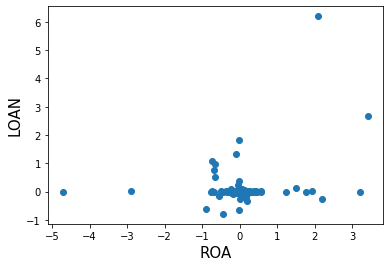

In [32]:
import matplotlib.pyplot as plt

plt.scatter(modelo.ROA,modelo.LOAN)
plt.ylabel(r'LOAN', fontsize=15, color='black')
plt.xlabel(r'ROA', fontsize=15, color='black')

Text(0.5, 0, 'beta1')

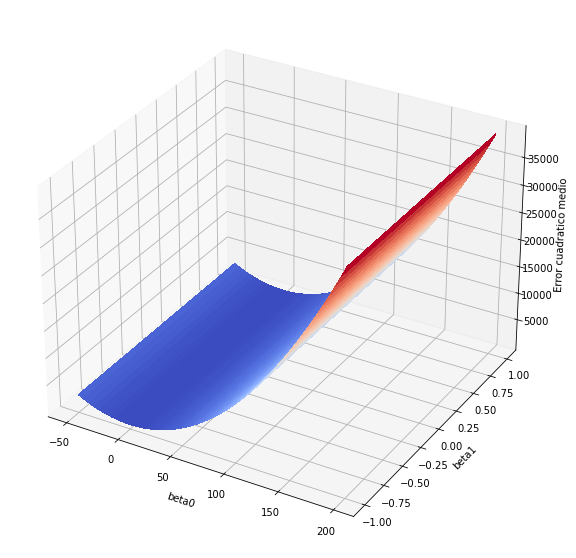

In [36]:
def error_cuadratico_medio(X,y,beta):
  error=0.0
  for n,val in enumerate(y):
    y_est = beta[0] + beta[1]*X[n]
    error = error + (y_est - y[n])**2
  return error/len(y)

beta0 = np.arange(-50,200,0.25)
beta = np.arange(-1,1,0.01)
X0, Y0 = np.meshgrid(beta0, beta)

Z = error_cuadratico_medio(modelo.LOAN,modelo.PROV,[X0,Y0])

from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 10))
surf = ax.plot_surface(X0, Y0, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_zlabel('Error cuadratico medio')
ax.set_xlabel('beta0')
ax.set_ylabel('beta1')

In [75]:
from sklearn.linear_model import LinearRegression
columnas_interes = ['LOAN','CAP']
columnas_interes2 = ['ROA']
X = modelo[columnas_interes]
y = modelo[columnas_interes2]

reg = LinearRegression()
reg.fit(X,y)

estimated = [reg.intercept_, reg.coef_]  # los parametros estimados
print(estimated)

R2 = reg.score(X,y) # R2
print(R2)


[array([0.00010905]), array([[0.36326372, 0.57379446]])]
0.09594478462709843


In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [55]:
# Coeficientes del modelo 
beta_0_estimado = reg.intercept_
beta_1_estimado = reg.coef_[0]

print('Ordenada al origen = ',format(beta_0_estimado))
print('Pendiente = ',format(beta_1_estimado))

Ordenada al origen =  [0.00010905]
Pendiente =  [0.36326372 0.57379446]


In [56]:
# Calidad del ajuste
print('Calidad de ajuste R^2 = ',format(reg.score(X, y)))

Calidad de ajuste R^2 =  0.09594478462709843


In [78]:
reg.predict(X_train)

array([[ 5.33103925e-03],
       [-2.19840273e-03],
       [-5.95583623e-03],
       [ 3.59606312e-03],
       [-3.24161223e-02],
       [-4.80252758e-03],
       [-6.47933337e-03],
       [ 1.58563271e-02],
       [-1.14443417e-02],
       [-3.15734480e-02],
       [ 2.70812791e-02],
       [-1.23125117e-02],
       [-6.56928256e-03],
       [-2.33824354e-03],
       [-8.43180707e-05],
       [ 2.79671805e-02],
       [ 3.70623505e-02],
       [-1.70194635e-02],
       [ 1.37115876e-02],
       [-1.58697418e-02],
       [-5.87984124e-03],
       [-5.32333133e-03],
       [ 2.96232784e-02],
       [ 3.46297550e-04],
       [ 1.76042369e-02],
       [-1.41665574e-02],
       [ 3.17574105e-03],
       [-1.71350731e-03],
       [-4.14649039e-03],
       [ 2.00614948e-03],
       [ 3.04844853e-02],
       [ 2.09575785e-02],
       [-6.39555918e-03],
       [ 1.58120129e-01],
       [-1.56090843e-02],
       [-2.30029155e-03],
       [-1.43662036e-02],
       [-1.12333825e-02],
       [-3.0

In [80]:
# Error de test del modelo 
# ==============================================================================
from sklearn.metrics import mean_squared_error
predicciones = reg.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[-0.01353124]
 [-0.00209106]
 [-0.00620998]]

El error (rmse) de test es: 0.16118398928884842


In [85]:
import statsmodels.api as sm
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo11 = sm.OLS(endog=y_train, exog=X_train,)
rrr = modelo11.fit()
print(rrr.summary())

                            OLS Regression Results                            
Dep. Variable:                    ROA   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     20.02
Date:                Fri, 23 Jul 2021   Prob (F-statistic):           3.48e-09
Time:                        11:59:53   Log-Likelihood:                -182.53
No. Observations:                 716   AIC:                             371.1
Df Residuals:                     713   BIC:                             384.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0017      0.012     -0.148      0.8

In [86]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
rrr.conf_int(alpha=0.05)

,0,1
const,-0.024731,0.021255
LOAN,0.296042,0.593333
CAP,0.203817,1.273652


In [87]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = rrr.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
477,0.005307,0.012623,-0.019477,0.030090,-0.609489,0.620102
336,-0.004863,0.011972,-0.028368,0.018643,-0.619608,0.609882
146,-0.009314,0.011866,-0.032611,0.013984,-0.624051,0.605423
359,0.002732,0.011762,-0.020359,0.025824,-0.611997,0.617462


In [92]:
######################################################################################################################
######################################################################################################################
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = rrr.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend()

ValueError: Wrong number of items passed 3, placement implies 1

In [93]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
intervalos_ci = rrr.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
const,-0.024731,0.021255
LOAN,0.296042,0.593333
CAP,0.203817,1.273652


In [95]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
y_train = y_train.values.flatten()
prediccion_train = rrr.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

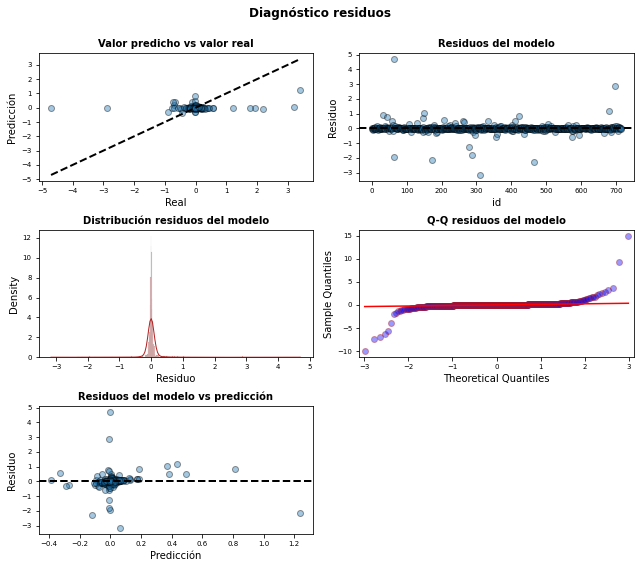

In [96]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

TEST DE NORMALIDAD
Se comprueba si los residuos siguen una distribución normal empleando dos test estadísticos: Shapiro-Wilk test y D'Agostino's K-squared test. Este último es el que incluye el summary de statsmodels bajo el nombre de Omnibus.

En ambos test, la hipótesis nula considera que los datos siguen una distribución normal, por lo tanto, si el p-value no es inferior al nivel de referencia alpha seleccionado, no hay evidencias para descartar que los datos se distribuyen de forma normal.

In [97]:
# Normalidad de los residuos Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(residuos_train)
shapiro_test

ShapiroResult(statistic=0.305827796459198, pvalue=1.401298464324817e-45)

In [98]:
# Normalidad de los residuos D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(residuos_train)
print(f"Estadítico= {k2}, p-value = {p_value}")

Estadítico= 638.6991712112706, p-value = 2.0334672083929306e-139


In [99]:
from sklearn.metrics import confusion_matrix

ypred = rrr.predict(X) # con esto obtengo la predicción de las etiquetas en base a mis datos

print(ypred)

cm = confusion_matrix(ypred, y) # primera entrada son las etiquetas predichas, segunda son las reales

print(cm)

ValueError: shapes (896,2) and (3,) not aligned: 2 (dim 1) != 3 (dim 0)

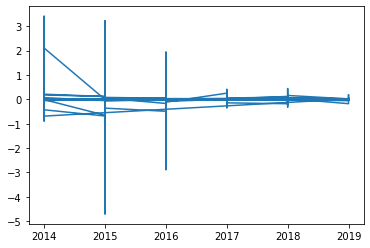

In [4]:
# haciendo grafica de lineas para ROA por años
modelo_nn = modelo.groupby(['year']).sum().reset_index()
plt.plot(modelo['year'], modelo['ROA'])
plt.show()

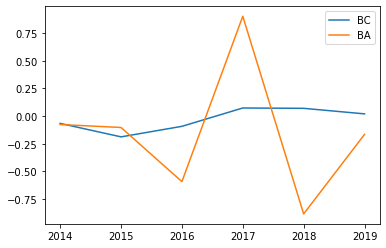

In [10]:
# haciendo grafica de lineas para gasto por edad para Mexico y España
modelo_nnn = modelo.groupby(['year', 'paises']).sum().reset_index()

# calculando datasets por pais
modelo_continental = modelo_nnn[modelo_nnn['paises'] == 'Banco Continental']
modelo_azteca = modelo_nnn[modelo_nnn['paises'] == 'Banco Azteca']

# haciendo la grafica
plt.plot(modelo_continental['year'], modelo_continental['ROA'], label='BC')
plt.plot(modelo_azteca['year'], modelo_azteca['ROA'], label='BA')
plt.legend()
plt.show()

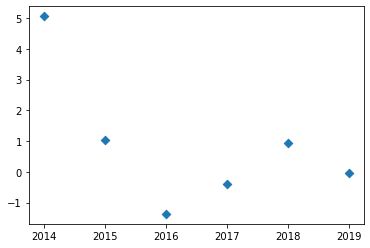

In [6]:
# haciendo grafica de lineas para gasto por edad con distintos markers
modelo_aa = modelo.groupby(['year']).sum().reset_index()
plt.scatter(modelo_aa['year'], modelo_aa['ROA'], marker='D')
plt.show()

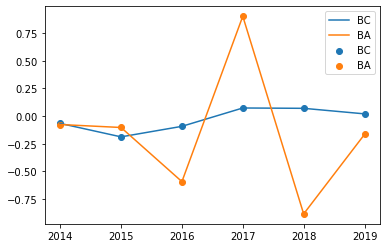

In [11]:
# haciendo grafica de lineas para gasto por edad para Mexico y España
modelo_nnn = modelo.groupby(['year', 'paises']).sum().reset_index()

# calculando datasets por pais
modelo_continental = modelo_nnn[modelo_nnn['paises'] == 'Banco Continental']
modelo_azteca = modelo_nnn[modelo_nnn['paises'] == 'Banco Azteca']

# haciendo la grafica
plt.scatter(modelo_continental['year'], modelo_continental['ROA'], label='BC')
plt.plot(modelo_continental['year'], modelo_continental['ROA'], label='BC')
plt.scatter(modelo_azteca['year'], modelo_azteca['ROA'], label='BA')
plt.plot(modelo_azteca['year'], modelo_azteca['ROA'], label='BA')
plt.legend()
plt.show()

In [12]:
# miramos ahora las tipologia de variables que tenemos
modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   paises  896 non-null    object 
 1   mes     896 non-null    object 
 2   year    896 non-null    int64  
 3   ROA     896 non-null    float64
 4   SIZE    896 non-null    float64
 5   CAP     896 non-null    float64
 6   LOAN    896 non-null    float64
 7   DEP     896 non-null    float64
 8   PROV    896 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 63.1+ KB


In [13]:
modelo.describe()

,year,ROA,SIZE,CAP,LOAN,DEP,PROV
count,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000
mean,2016.187500,0.005835,0.053404,0.001625,0.013197,0.001255,0.013057
std,1.550815,0.303685,1.464402,0.043819,0.249576,0.053563,0.253136
min,2014.000000,-4.706470,-0.978852,-0.356285,-0.788848,-0.467746,-0.785253
25%,2015.000000,-0.018518,-0.013516,-0.015015,-0.006514,-0.014379,-0.013070
50%,2016.000000,0.000061,0.004522,-0.003105,-0.000610,-0.000422,0.005525
75%,2017.250000,0.018151,0.022678,0.012755,0.003900,0.013716,0.021685
max,2019.000000,3.413390,43.577632,0.455854,6.197294,0.910059,6.093251


<AxesSubplot:xlabel='paises', ylabel='count'>

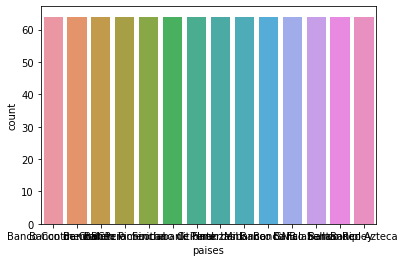

In [15]:
# empezamos con un grafico de barras de la proveniencia geografica
sns.countplot(x='paises', data=modelo)

<AxesSubplot:ylabel='CAP'>

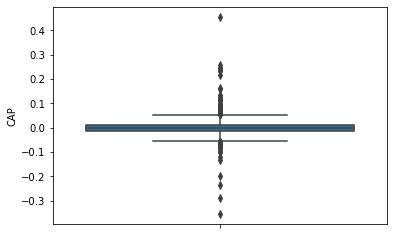

In [16]:
# ahora hacemos un boxplot de la variable success
sns.boxplot(y = 'CAP', data = modelo)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ROA', ylabel='Density'>

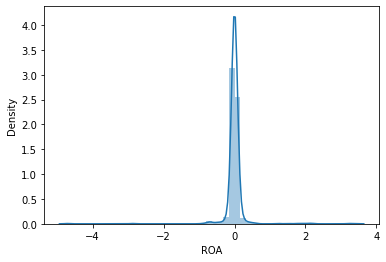

In [17]:
#seguimos con un histograma
sns.distplot(modelo['ROA'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ROA'>

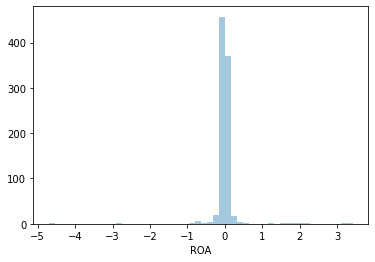

In [18]:
# y si quieremos ver frequencias en lugar de probabilidades
sns.distplot(modelo['ROA'], kde = False)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ROA'>

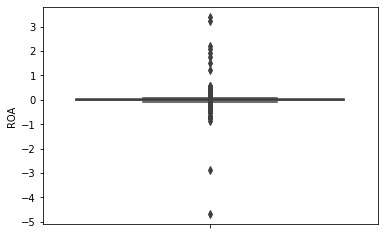

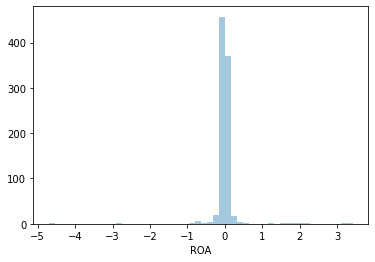

In [19]:
# por fin, miramos histograma y boxplot de alcohol
sns.boxplot(y = 'ROA', data = modelo)
plt.figure()
sns.distplot(modelo['ROA'], kde = False)

ANALISIS MULTIVARIADO

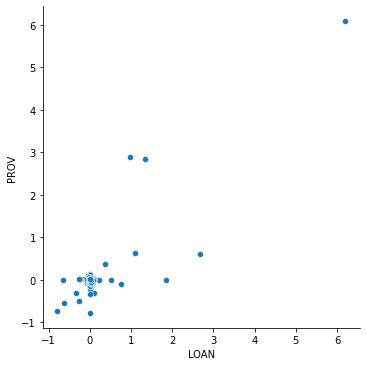

In [20]:
# Primero empezamos con el scatter plot
sns.relplot(x="LOAN", y="PROV", data=modelo)

<AxesSubplot:xlabel='LOAN', ylabel='PROV'>

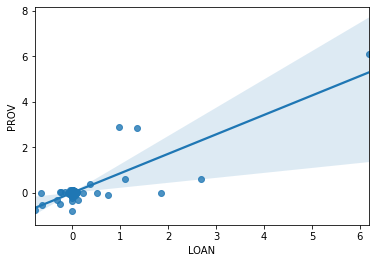

In [21]:
# ahora scatter plot mas linea, para identificar mejor las tendencias
sns.regplot(x="LOAN", y="PROV", data=modelo)

AxesSubplot(0.125,0.125;0.775x0.755)


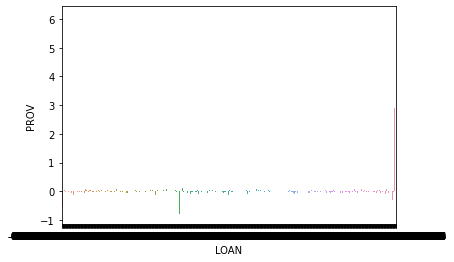

In [22]:
# ahora vamos con correlacion entre variable categorica y variable numerica!
print(sns.barplot(x="LOAN", y="PROV", data=modelo))

<AxesSubplot:xlabel='LOAN', ylabel='PROV'>

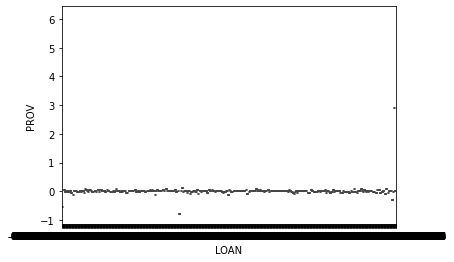

In [23]:
# mismas variables, con el boxplot lo vemos con mas detalles
sns.boxplot(x="LOAN", y="PROV", data=modelo)

<AxesSubplot:>

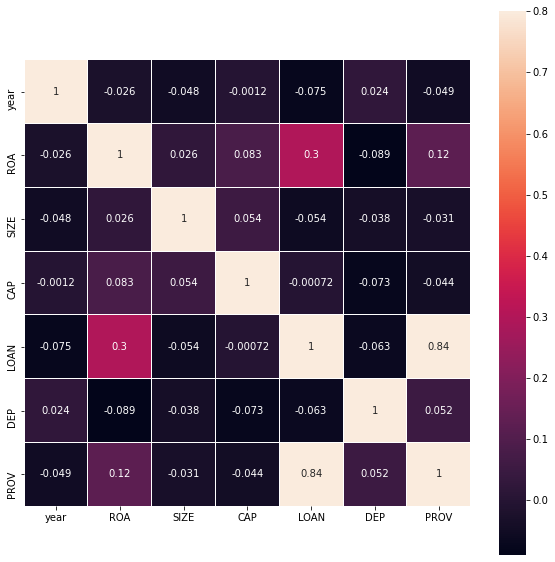

In [24]:
# y si queremos mirar todas las correlaciones?
corr = modelo.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True)

VISUALIZACIÓN DE DATOS

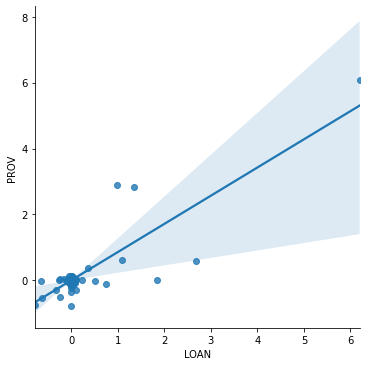

In [25]:
sns.lmplot(x="LOAN", y="PROV", data=modelo)

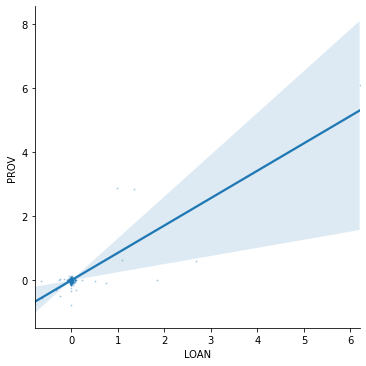

In [26]:
sns.lmplot(x="LOAN", y="PROV", data=modelo, truncate = True, scatter_kws={'s':0.8, 'alpha':0.3})

In [28]:
# Agrupando datos por genero y contando
df_modelo = modelo.groupby(['paises']).count()
df_modelo = df_modelo.rename(columns={"paises": "count"})
df_modelo

,mes,year,ROA,SIZE,CAP,LOAN,DEP,PROV
paises,,,,,,,,
BCP,64,64,64,64,64,64,64,64
Banco Azteca,64,64,64,64,64,64,64,64
Banco Continental,64,64,64,64,64,64,64,64
Banco Falabella,64,64,64,64,64,64,64,64
Banco GNB,64,64,64,64,64,64,64,64
Banco Interamericano de Finanzas,64,64,64,64,64,64,64,64
Banco Pichincha,64,64,64,64,64,64,64,64
Banco Ripley,64,64,64,64,64,64,64,64
Banco Santander,64,64,64,64,64,64,64,64


In [29]:
# Agrupando datos por edad y contando
df_modelo_media = modelo.groupby(['paises']).mean()
df_modelo_media

,year,ROA,SIZE,CAP,LOAN,DEP,PROV
paises,,,,,,,
BCP,2016.1875,0.009380,0.686749,0.001710,-0.005722,-0.001251,-0.002098
Banco Azteca,2016.1875,-0.014316,-0.018106,0.007632,0.016226,0.005880,0.043323
Banco Continental,2016.1875,-0.002825,0.005333,0.002718,-0.001512,0.000711,0.001991
Banco Falabella,2016.1875,0.037324,-0.001412,0.002549,0.040883,0.001310,0.019814
Banco GNB,2016.1875,0.001072,-0.004167,0.000247,0.008044,0.009478,-0.008529
Banco Interamericano de Finanzas,2016.1875,0.023581,0.006548,0.000209,-0.006844,0.001575,0.004293
Banco Pichincha,2016.1875,-0.013644,-0.008287,-0.000573,0.007091,0.000761,0.003428
Banco Ripley,2016.1875,0.027534,-0.002082,-0.000502,0.094814,-0.003171,0.088415
Banco Santander,2016.1875,0.003499,0.004624,0.000672,-0.013340,0.000671,-0.019961


In [30]:
# seleccionar una columna opcion 1
modelo['paises']

0      Banco Continental
1      Banco Continental
2      Banco Continental
3      Banco Continental
4      Banco Continental
             ...        
891         Banco Azteca
892         Banco Azteca
893         Banco Azteca
894         Banco Azteca
895         Banco Azteca
Name: paises, Length: 896, dtype: object

In [31]:
# utilidad de seleccionar con listas
columnas_interes = ['paises', 'ROA', 'LOAN']
a_modelo = modelo[columnas_interes]
a_modelo

,paises,ROA,LOAN
0,Banco Continental,-0.013965,-0.003443
1,Banco Continental,-0.010738,-0.011496
2,Banco Continental,-0.001870,-0.002783
3,Banco Continental,-0.001295,-0.007343
4,Banco Continental,-0.001231,-0.009992
...,...,...,...
891,Banco Azteca,0.031409,0.019927
892,Banco Azteca,-0.178337,0.024145
893,Banco Azteca,-0.159987,0.019368
894,Banco Azteca,0.188452,0.016775


In [32]:
# eliminar una columna
a_modelo.drop(columns='LOAN')

,paises,ROA
0,Banco Continental,-0.013965
1,Banco Continental,-0.010738
2,Banco Continental,-0.001870
3,Banco Continental,-0.001295
4,Banco Continental,-0.001231
...,...,...
891,Banco Azteca,0.031409
892,Banco Azteca,-0.178337
893,Banco Azteca,-0.159987
894,Banco Azteca,0.188452


In [34]:
# filtrando para genero femenino
modelo[modelo['paises'] == 'Banco Azteca']

,paises,mes,year,ROA,SIZE,CAP,LOAN,DEP,PROV
832,Banco Azteca,enero,2014,0.006009,0.016803,0.007448,-0.000994,0.002317,-0.006500
833,Banco Azteca,febrero,2014,0.000925,0.001997,-0.009409,-0.003523,0.022637,-0.034983
834,Banco Azteca,marzo,2014,-0.017493,-0.006332,-0.002714,-0.003236,-0.000215,-0.042492
835,Banco Azteca,abril,2014,0.014981,0.020754,-0.002721,-0.002134,-0.027172,-0.055909
836,Banco Azteca,mayo,2014,-0.028129,-0.007268,-0.023874,0.000312,-0.045418,-0.024106
...,...,...,...,...,...,...,...,...,...
891,Banco Azteca,diciembre,2018,0.031409,-0.006974,0.014571,0.019927,0.001924,-0.041961
892,Banco Azteca,enero,2019,-0.178337,-0.000276,-0.009848,0.024145,0.014615,-0.052837
893,Banco Azteca,febrero,2019,-0.159987,-0.021146,-0.034811,0.019368,-0.001889,0.028049
894,Banco Azteca,marzo,2019,0.188452,0.003334,0.001288,0.016775,-0.010945,-0.009681


In [35]:
# filtrando para edades mayores a 30 (pero no iguales)
modelo[modelo['ROA']>0]

,paises,mes,year,ROA,SIZE,CAP,LOAN,DEP,PROV
5,Banco Continental,junio,2014,0.002347,-0.018064,0.002317,-0.001105,-0.008156,-0.051380
9,Banco Continental,octubre,2014,0.004392,-0.020032,0.116078,0.001696,0.024642,0.015292
15,Banco Continental,abril,2015,0.000159,0.022000,0.014126,0.005565,0.008543,0.018438
19,Banco Continental,agosto,2015,0.003986,-0.033971,0.053476,0.001337,0.035868,0.026369
28,Banco Continental,mayo,2016,0.000023,0.007456,-0.008639,-0.013183,-0.005382,0.028690
...,...,...,...,...,...,...,...,...,...
880,Banco Azteca,enero,2018,0.119514,-0.023174,-0.027068,0.018700,-0.001456,-0.071799
881,Banco Azteca,febrero,2018,0.008490,-0.031505,-0.018161,0.021172,-0.016671,0.037318
883,Banco Azteca,abril,2018,0.135293,-0.041957,-0.016834,0.022633,-0.007090,0.046494
891,Banco Azteca,diciembre,2018,0.031409,-0.006974,0.014571,0.019927,0.001924,-0.041961


In [37]:
# condiciones para filtrar
cond1 = modelo['paises'] == 'Banco Azteca'
cond2 = modelo['ROA']>0
# filtrar por varias condiciones con "y"
modelo[cond1 & cond2].count()

paises    29
mes       29
year      29
ROA       29
SIZE      29
CAP       29
LOAN      29
DEP       29
PROV      29
dtype: int64

In [38]:
# crear columnas condicionalmente
condiciones = [
    (modelo["ROA"]<0),
    (modelo["ROA"]>=0),
    (modelo["ROA"]>0.5),
]
opciones = ["malo", "bueno", "sobresaliente"]

# incluir condiciones y opciones
modelo["resultado"] = np.select(condiciones, opciones)
modelo

,paises,mes,year,ROA,SIZE,CAP,LOAN,DEP,PROV,resultado
0,Banco Continental,enero,2014,-0.013965,0.015743,-0.021277,-0.003443,-0.022750,0.024337,malo
1,Banco Continental,febrero,2014,-0.010738,-0.004098,0.000000,-0.011496,0.028613,0.016006,malo
2,Banco Continental,marzo,2014,-0.001870,0.014318,-0.006441,-0.002783,-0.008801,-0.006415,malo
3,Banco Continental,abril,2014,-0.001295,-0.009271,0.004052,-0.007343,0.021576,0.022557,malo
4,Banco Continental,mayo,2014,-0.001231,0.008980,0.045198,-0.009992,0.001249,0.012161,malo
...,...,...,...,...,...,...,...,...,...,...
891,Banco Azteca,diciembre,2018,0.031409,-0.006974,0.014571,0.019927,0.001924,-0.041961,bueno
892,Banco Azteca,enero,2019,-0.178337,-0.000276,-0.009848,0.024145,0.014615,-0.052837,malo
893,Banco Azteca,febrero,2019,-0.159987,-0.021146,-0.034811,0.019368,-0.001889,0.028049,malo
894,Banco Azteca,marzo,2019,0.188452,0.003334,0.001288,0.016775,-0.010945,-0.009681,bueno


In [1]:
modelo

NameError: name 'modelo' is not defined

In [39]:
# ordenar por edad de forma ascendente: de menor a mayor
modelo.sort_values(by=['ROA'])

,paises,mes,year,ROA,SIZE,CAP,LOAN,DEP,PROV,resultado
526,Mibanco,marzo,2015,-4.706470,-0.046821,0.003630,-0.012133,-0.037830,0.025934,malo
538,Mibanco,marzo,2016,-2.888350,-0.011277,-0.013166,0.011275,-0.003386,0.009503,malo
584,Banco GNB,septiembre,2014,-0.888929,-0.715496,-0.062542,-0.625752,0.254673,-0.550074,malo
525,Mibanco,febrero,2015,-0.752540,-0.014689,-0.006611,-0.014318,-0.012091,0.041063,malo
537,Mibanco,febrero,2016,-0.748545,0.022825,-0.007215,0.009683,0.005411,-0.002033,malo
...,...,...,...,...,...,...,...,...,...,...
539,Mibanco,abril,2016,1.939118,0.000434,-0.005458,0.012402,0.011205,0.012324,bueno
779,Banco Ripley,diciembre,2014,2.105235,-0.763261,0.074047,6.197294,-0.146720,6.093251,bueno
259,Banco Interamericano de Finanzas,abril,2014,2.192042,-0.188762,-0.004815,-0.252720,0.039804,-0.496982,bueno
406,Citibank,noviembre,2015,3.223670,-0.186931,0.093555,-0.003765,0.087892,-0.785253,bueno


In [40]:
# ordenar por edad de forma ascendente: de mayor a menor
modelo.sort_values(by=['ROA'], ascending=False)

,paises,mes,year,ROA,SIZE,CAP,LOAN,DEP,PROV,resultado
649,Banco Falabella,octubre,2014,3.413390,-0.416724,0.069454,2.676668,-0.182377,0.600604,bueno
406,Citibank,noviembre,2015,3.223670,-0.186931,0.093555,-0.003765,0.087892,-0.785253,bueno
259,Banco Interamericano de Finanzas,abril,2014,2.192042,-0.188762,-0.004815,-0.252720,0.039804,-0.496982,bueno
779,Banco Ripley,diciembre,2014,2.105235,-0.763261,0.074047,6.197294,-0.146720,6.093251,bueno
539,Mibanco,abril,2016,1.939118,0.000434,-0.005458,0.012402,0.011205,0.012324,bueno
...,...,...,...,...,...,...,...,...,...,...
537,Mibanco,febrero,2016,-0.748545,0.022825,-0.007215,0.009683,0.005411,-0.002033,malo
525,Mibanco,febrero,2015,-0.752540,-0.014689,-0.006611,-0.014318,-0.012091,0.041063,malo
584,Banco GNB,septiembre,2014,-0.888929,-0.715496,-0.062542,-0.625752,0.254673,-0.550074,malo
538,Mibanco,marzo,2016,-2.888350,-0.011277,-0.013166,0.011275,-0.003386,0.009503,malo


In [42]:
# ordenar por pais y gasto ambos de forma ascendente: de mayor a menor
modelo.sort_values(by=['paises', 'ROA'])

,paises,mes,year,ROA,SIZE,CAP,LOAN,DEP,PROV,resultado
154,BCP,marzo,2016,-0.086514,0.007478,0.022825,-0.042952,-0.018984,0.022275,malo
133,BCP,junio,2014,-0.022454,0.006354,0.010054,-0.006120,-0.018786,-0.005099,malo
170,BCP,julio,2017,-0.020690,0.003121,-0.010161,-0.008530,0.001876,0.016846,malo
175,BCP,diciembre,2017,-0.018513,0.011755,-0.008490,0.006298,-0.006598,-0.008118,malo
140,BCP,enero,2015,-0.017790,0.015398,0.013532,0.002289,-0.006828,0.037249,malo
...,...,...,...,...,...,...,...,...,...,...
339,Scotiabank Peru,agosto,2015,0.025701,0.017214,0.043277,-0.000343,0.013610,0.005374,bueno
332,Scotiabank Peru,enero,2015,0.027182,0.031492,0.068858,0.010921,-0.019892,-0.015649,bueno
336,Scotiabank Peru,mayo,2015,0.027366,0.021289,-0.008264,0.006702,0.009379,-0.028682,bueno
335,Scotiabank Peru,abril,2015,0.067803,-0.016898,-0.005975,0.004650,0.003564,-0.034012,bueno


In [43]:
# buscar venta con máximo de gasto
modelo[modelo['ROA'] == modelo['ROA'].max()]

,paises,mes,year,ROA,SIZE,CAP,LOAN,DEP,PROV,resultado
649,Banco Falabella,octubre,2014,3.41339,-0.416724,0.069454,2.676668,-0.182377,0.600604,bueno


In [44]:
# calcular suma de gastos el día lunes
modelo_2015 = modelo[modelo['year']==2015]
modelo_2015['ROA'].mean()

0.006168750086546518

In [45]:
# agrupar por pais y genero, luego calcular la mediana
modelo.groupby([modelo['paises']=='Scotiabank Peru', 'year']).mean()

ROA      SIZE       CAP      LOAN       DEP      PROV
paises year                                                            
False  2014  0.023023  0.270755 -0.000304  0.073326  0.001021  0.049285
       2015  0.006201  0.011300  0.000753  0.005100  0.000200  0.015248
       2016 -0.008211  0.008318  0.002720 -0.003133  0.001331  0.001889
       2017 -0.002911 -0.000642  0.009281 -0.001785 -0.001223  0.003455
       2018  0.005984  0.001160 -0.003722  0.001740  0.006080  0.006348
       2019 -0.001418  0.004065 -0.000246 -0.000597  0.001893 -0.003203
True   2014  0.122545  0.148920 -0.001410  0.007243 -0.010015 -0.020703
       2015  0.005754  0.019258  0.005091 -0.002020 -0.007162  0.003424
       2016 -0.007368  0.008055  0.003449  0.001829  0.002556  0.007235
       2017  0.004714  0.003359  0.001144  0.002605  0.002159  0.000574
       2018  0.001014  0.005446  0.002991  0.000420  0.002700  0.005027
       2019  0.006245  0.009738 -0.007035 -0.001079 -0.003120  0.006940

In [46]:
# agrupar por pais y genero, luego calcular la mediana
modelo.groupby(['paises', 'year']).mean()

ROA      SIZE       CAP      LOAN       DEP  \
paises          year                                                     
BCP             2014  0.025951  3.637722  0.011678 -0.026120 -0.005834   
                2015  0.013652  0.014702 -0.005064  0.001412 -0.005067   
                2016 -0.000373  0.002474  0.009681  0.001715 -0.002238   
                2017  0.002194  0.002136  0.004453 -0.005791  0.002488   
                2018  0.005546  0.002777 -0.007141 -0.002438  0.002874   
...                        ...       ...       ...       ...       ...   
Scotiabank Peru 2015  0.005754  0.019258  0.005091 -0.002020 -0.007162   
                2016 -0.007368  0.008055  0.003449  0.001829  0.002556   
                2017  0.004714  0.003359  0.001144  0.002605  0.002159   
                2018  0.001014  0.005446  0.002991  0.000420  0.002700   
                2019  0.006245  0.009738 -0.007035 -0.001079 -0.003120   

                          PROV  
paises          year            
BCP             2014 -0.021942  
                2015  0.006922  
                2016  0.008230  
                2017  0.004757  
                2018 -0.006474  
...                        ...  
Scotiabank Peru 2015  0.003424  
                2016  0.007235  
                2017  0.000574  
                2018  0.005027  
                2019  0.006940  

[84 rows x 6 columns]

In [48]:
modelo.dtypes

paises        object
mes           object
year           int64
ROA          float64
SIZE         float64
CAP          float64
LOAN         float64
DEP          float64
PROV         float64
resultado     object
dtype: object

In [50]:
is_2014 = modelo['year'] == 2014

modelo_2014 = modelo[is_2014]

print(modelo_2014.head())

print('cantidad de datos', len(modelo_2014))

              paises      mes  year       ROA      SIZE       CAP      LOAN  \
0  Banco Continental   enero   2014 -0.013965  0.015743 -0.021277 -0.003443   
1  Banco Continental  febrero  2014 -0.010738 -0.004098  0.000000 -0.011496   
2  Banco Continental    marzo  2014 -0.001870  0.014318 -0.006441 -0.002783   
3  Banco Continental    abril  2014 -0.001295 -0.009271  0.004052 -0.007343   
4  Banco Continental     mayo  2014 -0.001231  0.008980  0.045198 -0.009992   

        DEP      PROV resultado  
0 -0.022750  0.024337      malo  
1  0.028613  0.016006      malo  
2 -0.008801 -0.006415      malo  
3  0.021576  0.022557      malo  
4  0.001249  0.012161      malo  
cantidad de datos 168


In [51]:
modelo_2014.groupby(['paises']).mean()['ROA']

paises
BCP                                 0.025951
Banco Azteca                       -0.006320
Banco Continental                  -0.005483
Banco Falabella                     0.273183
Banco GNB                          -0.046013
Banco Interamericano de Finanzas    0.167983
Banco Pichincha                    -0.061241
Banco Ripley                        0.173607
Banco Santander                    -0.012989
Banco de Comercio                   0.000484
Citibank                           -0.077034
Interbank                          -0.015991
Mibanco                            -0.116842
Scotiabank Peru                     0.122545
Name: ROA, dtype: float64

In [52]:
print('minimo: ', modelo['year'].min())
print('maximo: ', modelo['year'].max())

minimo:  2014
maximo:  2019


In [56]:
modelo[(modelo['year']==2014) & (modelo['paises']=='BCP')]

,paises,mes,year,ROA,SIZE,CAP,LOAN,DEP,PROV,resultado
128,BCP,enero,2014,0.012538,-0.011983,0.026194,-0.003930,-0.000666,0.029527,bueno
129,BCP,febrero,2014,0.198178,43.577632,0.088589,-0.327370,-0.042565,-0.303491,bueno
130,BCP,marzo,2014,0.010840,0.005655,-0.002759,0.003476,-0.018790,0.028390,bueno
131,BCP,abril,2014,-0.011752,0.021227,0.042185,-0.000418,0.011034,-0.026404,malo
132,BCP,mayo,2014,0.004965,-0.007551,-0.009954,0.002225,0.013712,0.028327,bueno
133,BCP,junio,2014,-0.022454,0.006354,0.010054,-0.006120,-0.018786,-0.005099,malo
134,BCP,julio,2014,-0.014932,-0.006167,-0.002654,-0.001963,0.010766,0.016377,malo
135,BCP,agosto,2014,0.037349,0.030575,-0.005323,-0.004656,0.009625,-0.001505,bueno
136,BCP,septiembre,2014,0.034518,0.010379,-0.024749,0.003367,-0.031722,-0.011770,bueno
137,BCP,octubre,2014,0.019232,0.008090,-0.063786,0.015116,-0.003987,0.022537,bueno


<AxesSubplot:>

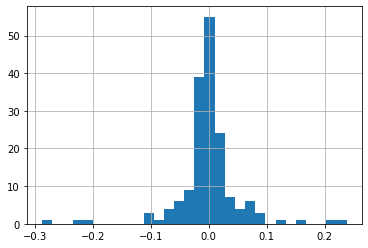

In [59]:
modelo_2014['CAP'].hist(bins = 30)

<AxesSubplot:ylabel='paises'>

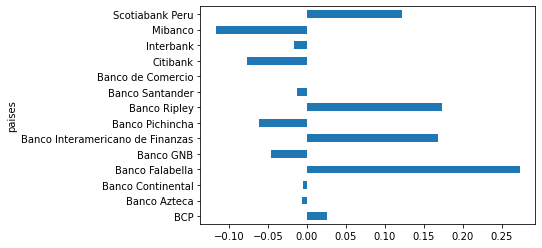

In [60]:
modelo_2014.groupby(['paises']).mean()['ROA'].plot.barh()

<AxesSubplot:xlabel='paises'>

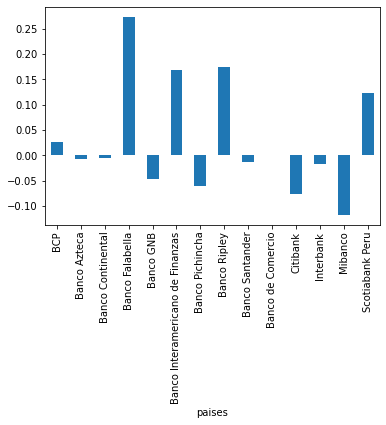

In [61]:
modelo_2014.groupby(['paises']).mean()['ROA'].plot.bar()

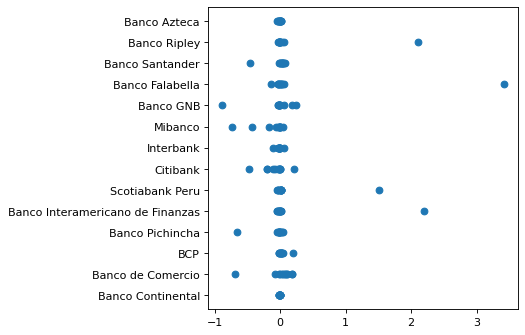

In [64]:
plt.figure(figsize=(5,5),dpi=80)
plt.scatter(x=modelo_2014['ROA'], y=modelo_2014['paises'])

In [65]:
modelo_2014['ROA'].quantile([0,0.25,0.5,0.75,1])

0.00   -0.888929
0.25   -0.022107
0.50   -0.004433
0.75    0.016590
1.00    3.413390
Name: ROA, dtype: float64

In [66]:
modelo['ROA'].quantile([0,0.25,0.5,0.75,1])

0.00   -4.706470
0.25   -0.018518
0.50    0.000061
0.75    0.018151
1.00    3.413390
Name: ROA, dtype: float64

<AxesSubplot:>

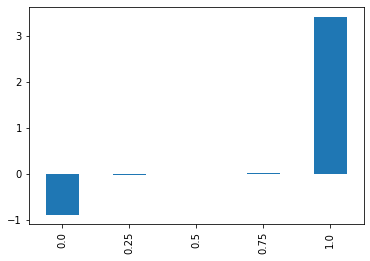

In [67]:
modelo_2014['ROA'].quantile(np.linspace(0,1,5)).plot.bar()